In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import medfilt

import pose
from pose_parser import parse_file, detect_perspective



In [27]:
good_videos = [parse_file("dataset/bicep/bicep_good_"+ str(i) +".npy") for i in range(1,10)]
bad_videos = [parse_file("dataset/bicep/bicep_bad_" + str(i) + ".npy") for i in range(1,8)]



Data shape:  (114, 18, 3)
Mean torso:  360.11485467535044
Data shape:  (101, 18, 3)
Mean torso:  361.91618075058716
Data shape:  (140, 18, 3)
Mean torso:  274.49230143795376
Data shape:  (122, 18, 3)
Mean torso:  276.056770970454
Data shape:  (113, 18, 3)
Mean torso:  386.10674117118276
Data shape:  (117, 18, 3)
Mean torso:  388.8324699035529
Data shape:  (92, 18, 3)
Mean torso:  364.56482601788053
Data shape:  (120, 18, 3)
Mean torso:  364.55769028003914
Data shape:  (102, 18, 3)
Mean torso:  389.4333451516014
Data shape:  (108, 18, 3)
Mean torso:  359.69948300318237
Data shape:  (146, 18, 3)
Mean torso:  362.94356251552193
Data shape:  (123, 18, 3)
Mean torso:  271.04817985102164
Data shape:  (100, 18, 3)
Mean torso:  274.544553716319
Data shape:  (127, 18, 3)
Mean torso:  276.5870125620258
Data shape:  (80, 18, 3)
Mean torso:  382.9545547331215
Data shape:  (108, 18, 3)
Mean torso:  366.72702499907354


In [28]:
# # old one
# for video in good_videos:
#     frames = video

#     side = detect_perspective(frames)

#     if (side == pose.Side.right):
#         upper_arm_vecs = np.array([pose.Joint.vector_from_joints(frame.rshoulder, frame.relbow) for frame in frames])
#         lower_arm_vecs = np.array([pose.Joint.vector_from_joints(frame.relbow, frame.rwrist) for frame in frames])
#     else:
#         upper_arm_vecs = np.array([pose.Joint.vector_from_joints(frame.lshoulder, frame.lelbow) for frame in frames])
#         lower_arm_vecs = np.array([pose.Joint.vector_from_joints(frame.lelbow, frame.lwrist) for frame in frames])

#     # print(lower_arm_vecs)
#     print (upper_arm_vecs.shape)
#     print (upper_arm_vecs[0])

#     #Find the unit vector vec/mag(normalization axis=1)
#     upper_arm_vecs = upper_arm_vecs/ np.expand_dims(np.linalg.norm(upper_arm_vecs, axis=1), axis=1)
#     lower_arm_vecs = lower_arm_vecs/ np.expand_dims(np.linalg.norm(lower_arm_vecs, axis=1), axis=1)

#     #Angle = cos inverse of product of two unit vectors
#     # np.multiply(upper_arm_vecs, lower_arm_vecs)
#     # np.sum(np.multiply(upper_arm_vecs, lower_arm_vecs), axis=1)
#     upper_arm_forearm_angle = np.degrees(np.arccos(np.clip(np.sum(np.multiply(upper_arm_vecs, lower_arm_vecs), axis=1), -1.0, 1.0)))
#     print(upper_arm_forearm_angle)


In [29]:
# upper_arm_vecs = upper_arm_vecs/ np.expand_dims(np.linalg.norm(upper_arm_vecs, axis=1), axis=1)
# lower_arm_vecs = lower_arm_vecs/ np.expand_dims(np.linalg.norm(upper_arm_vecs, axis=1), axis=1)

In [30]:
def plot_upperarm_forearm(upperarm_forearm_angles):
    upperarm_forearm_angles_filtered = medfilt(upperarm_forearm_angles, 5)
    upper_forearm_angles_filtered = medfilt(upperarm_forearm_angles_filtered, 5)
    # The minimum angle between these two, i.e. if user moved all the way up
    print("Minimum Angle between Upper Arm and Forearm: {}".format(np.min(upperarm_forearm_angles)))
    plt.scatter(np.arange(upperarm_forearm_angles.shape[0]),upperarm_forearm_angles, alpha=0.5)
    plt.scatter(np.arange(upperarm_forearm_angles_filtered.shape[0]),upperarm_forearm_angles_filtered, c='r', alpha=0.5)
    plt.xlabel('Frames')
    plt.ylabel('Angle between Upper Arm and Forearm')
    # Set range on y-axis so the plots are consistent
    plt.ylim(0,180) 
    plt.show()
    print("="*40)


In [31]:
def plot_upperarm_torso(upperarm_torso_angles):
    upperarm_torso_angles_filtered = medfilt(upperarm_torso_angles, 5)
    upperarm_torso_angles_filtered = medfilt(upperarm_torso_angles_filtered, 5)
    # Basically the amplitude of the first plot
    print("Range of Angles between Upper Arm and Torso: {}".format(np.max(upperarm_torso_angles)-np.min(upperarm_torso_angles)))

    # Generate plots
    plt.scatter(np.arange(upperarm_torso_angles.shape[0]),upperarm_torso_angles, alpha=0.5)
    plt.scatter(np.arange(upperarm_torso_angles_filtered.shape[0]),upperarm_torso_angles_filtered, c='r', alpha=0.5)
    plt.xlabel('Frames')
    plt.ylabel('Angle between Torso and Upper Arm')
    # Set range on y-axis so the plots are consistent
    plt.ylim(0,90) 
    plt.show()

Primary arm: Right
---------------GOOD---------------
Minimum Angle between Upper Arm and Forearm: 40.74447650965106


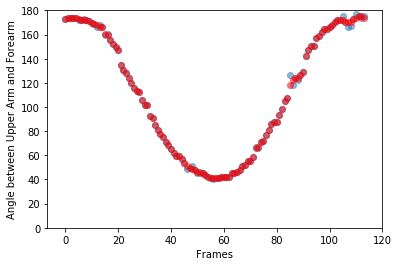

Range of Angles between Upper Arm and Torso: 21.150955500327434


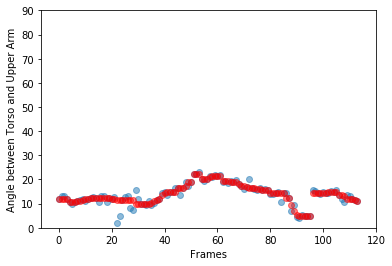

Primary arm: Right
---------------GOOD---------------
Minimum Angle between Upper Arm and Forearm: 41.37043416768523


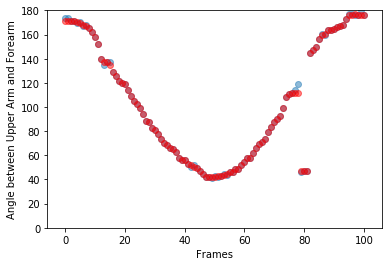

Range of Angles between Upper Arm and Torso: 19.514324857940657


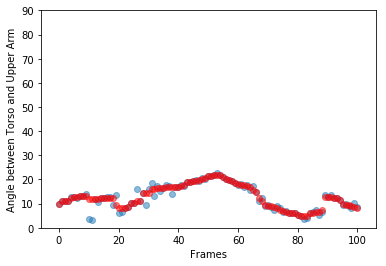

Primary arm: Right
---------------GOOD---------------
Minimum Angle between Upper Arm and Forearm: 53.53817447649482


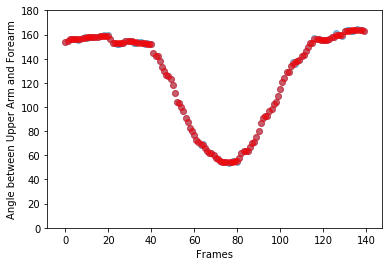

Range of Angles between Upper Arm and Torso: 13.781634499980157


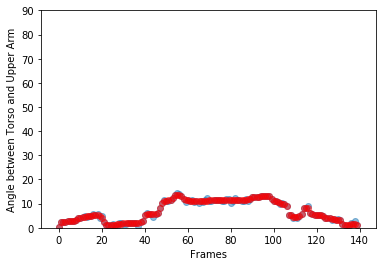

Primary arm: Right
---------------GOOD---------------
Minimum Angle between Upper Arm and Forearm: 53.035814961542336


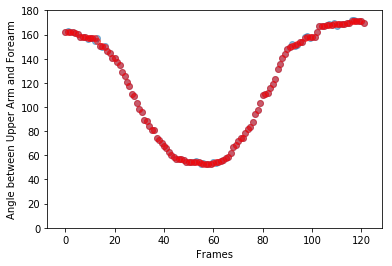

Range of Angles between Upper Arm and Torso: 8.269394105910706


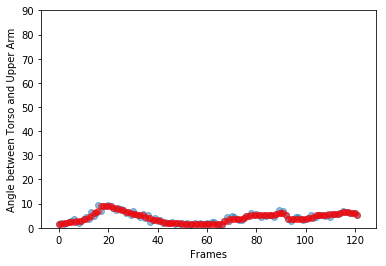

Primary arm: Left
---------------GOOD---------------
Minimum Angle between Upper Arm and Forearm: 45.59657232584041


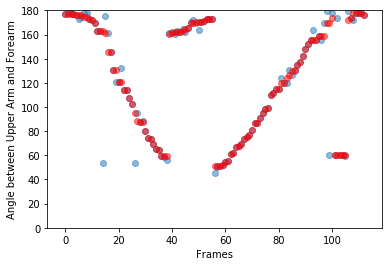

Range of Angles between Upper Arm and Torso: 10.870107436546887


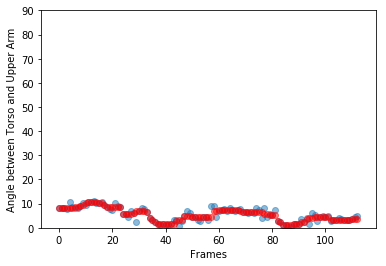

Primary arm: Left
---------------GOOD---------------
Minimum Angle between Upper Arm and Forearm: 43.601492572999156


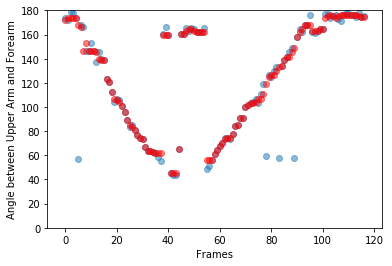

Range of Angles between Upper Arm and Torso: 11.140242134876958


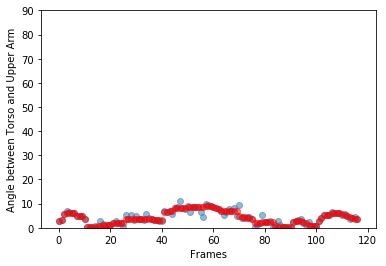

Primary arm: Right
---------------GOOD---------------
Minimum Angle between Upper Arm and Forearm: 32.03850166883438


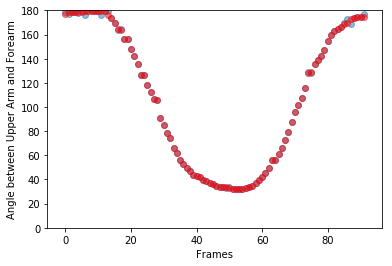

Range of Angles between Upper Arm and Torso: 12.125247430230303


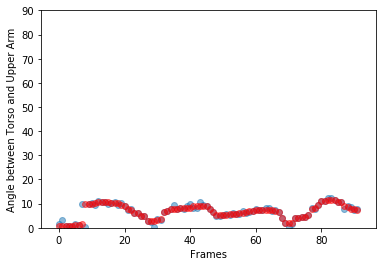

Primary arm: Right
---------------GOOD---------------
Minimum Angle between Upper Arm and Forearm: 32.1274706426665


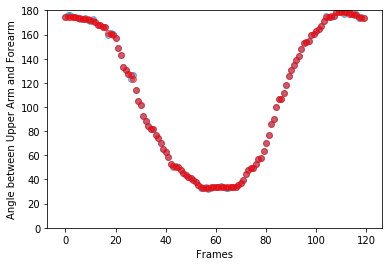

Range of Angles between Upper Arm and Torso: 13.669769078356863


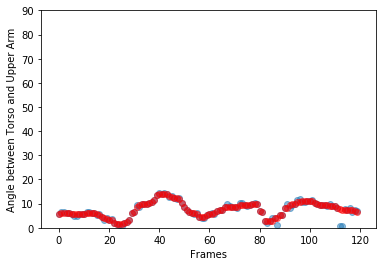

Primary arm: Left
---------------GOOD---------------
Minimum Angle between Upper Arm and Forearm: 35.553198545414155


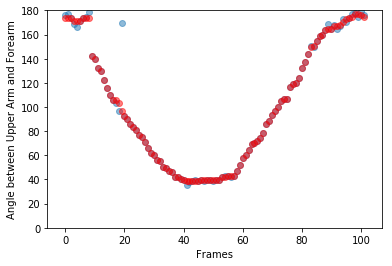

Range of Angles between Upper Arm and Torso: 18.26617476959192


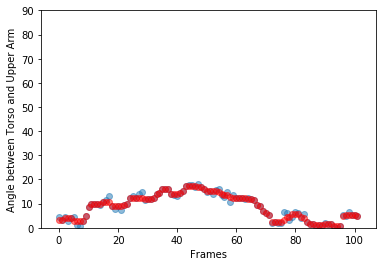

Primary arm: Right
---------------BAD---------------
Minimum Angle between Upper Arm and Forearm: 31.89380019853305


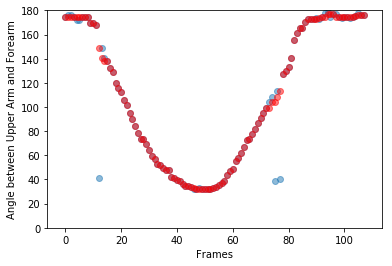

Range of Angles between Upper Arm and Torso: 35.23131076818897


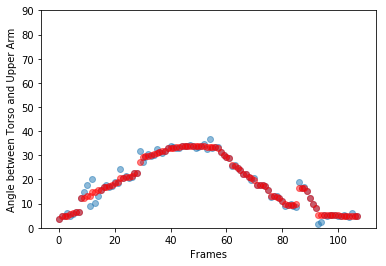

Primary arm: Right
---------------BAD---------------
Minimum Angle between Upper Arm and Forearm: 32.94776489071103


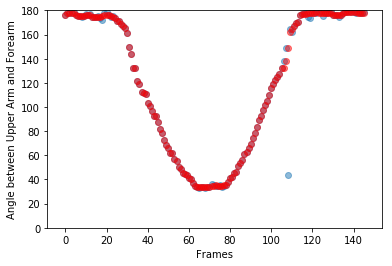

Range of Angles between Upper Arm and Torso: 51.65628085641167


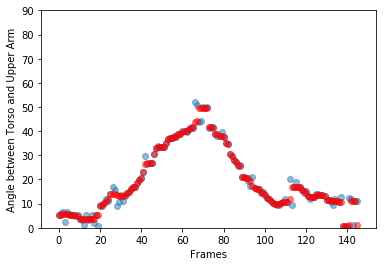

Primary arm: Right
---------------BAD---------------
Minimum Angle between Upper Arm and Forearm: 47.461209314430555


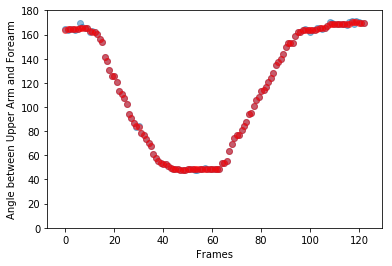

Range of Angles between Upper Arm and Torso: 47.86090725410961


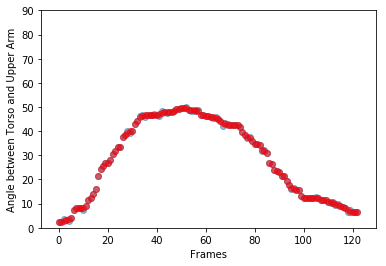

Primary arm: Right
---------------BAD---------------
Minimum Angle between Upper Arm and Forearm: 42.57700526684686


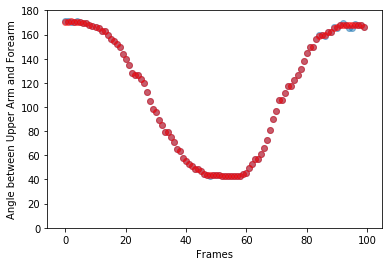

Range of Angles between Upper Arm and Torso: 66.10067607507816


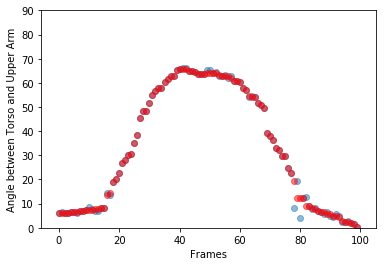

Primary arm: Right
---------------BAD---------------
Minimum Angle between Upper Arm and Forearm: 41.56022875358919


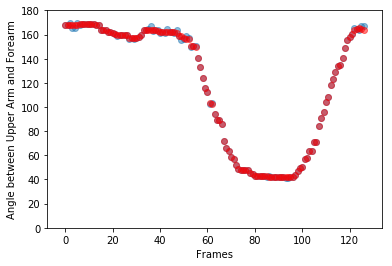

Range of Angles between Upper Arm and Torso: 48.902573661802236


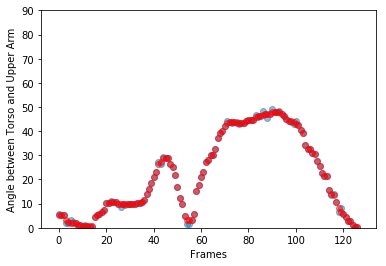

Primary arm: Right
---------------BAD---------------
Minimum Angle between Upper Arm and Forearm: 98.15693075632943


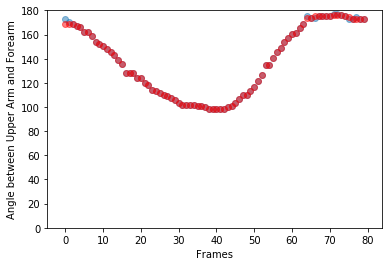

Range of Angles between Upper Arm and Torso: 8.527605281585986


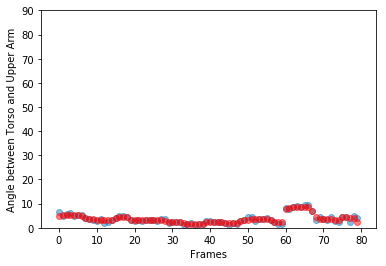

Primary arm: Left
---------------BAD---------------
Minimum Angle between Upper Arm and Forearm: 33.392575280372654


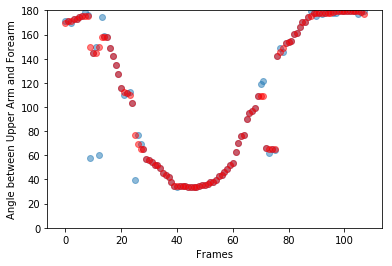

Range of Angles between Upper Arm and Torso: 21.706423481005686


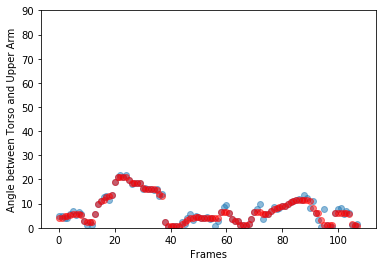

In [32]:
# Clearer code for angle
for video in good_videos+bad_videos:
    frames = video

    side = detect_perspective(frames)

    #Angles to calculate
    upperarm_forearm_angles = []
    upperarm_torso_angles = []

    for frame in frames:
        if (side == pose.Side.right):
            upperarm = pose.Part(frame.relbow, frame.rshoulder)
            forearm = pose.Part(frame.relbow, frame.rwrist)
            torso = pose.Part(frame.rhip, frame.neck)
        else:
            upperarm = pose.Part(frame.lelbow, frame.lshoulder)
            forearm = pose.Part(frame.lelbow, frame.lwrist)
            torso = pose.Part(frame.lhip, frame.neck)
        angle1 = upperarm.calculate_angle(forearm)
        angle2 = upperarm.calculate_angle(torso)
        upperarm_forearm_angles.append(angle1)
        upperarm_torso_angles.append(angle2)

    upperarm_forearm_angles = np.array(upperarm_forearm_angles)
    upperarm_torso_angles = np.array(upperarm_torso_angles)
    if video in good_videos:
        print("---------------GOOD---------------")
    else:
        print("---------------BAD---------------")
    plot_upperarm_forearm(upperarm_forearm_angles)
    plot_upperarm_torso(upperarm_torso_angles)

